## Importing All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import warnings
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset i.e. Nabil Bank (nabil) Stock Price Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/MSc. Dissertation/Dataset/nabil.csv')

In [3]:
df.head()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,3/20/2011,"1,200.00","1,190.00","1,160.00","1,170.00",0.0,853,"1,000,811.00"
1,3/24/2011,"1,162.00","1,178.00","1,150.00","1,153.00",0.0,356,"412,649.00"
2,3/25/2011,"1,153.00","1,174.00","1,145.00","1,174.00",0.0,702,"807,507.00"
3,3/27/2011,"1,174.00","1,160.00","1,120.00","1,147.00",0.0,"1,426.00","1,619,270.00"
4,3/28/2011,"1,147.00","1,150.00","1,110.00","1,132.00",0.0,352,"393,534.00"


In [4]:
df.tail()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
3078,9/18/2024,562,565,550,556,-0.93,"68,886.00","38,431,118.40"
3079,9/22/2024,556,578,556,562,1.08,"55,026.00","31,054,968.70"
3080,9/23/2024,573.2,573.2,555,568,1.07,"123,568.00","69,577,465.00"
3081,9/24/2024,567,567,552.1,553.5,-2.55,"66,337.00","36,962,336.00"
3082,9/25/2024,550,560,545.1,555,0.27,"50,441.00","27,867,328.70"


In [5]:
df.duplicated().sum()

1

## Copying the dataset for future use

In [6]:
df1 = df.copy()
df1.reset_index(inplace=True)

In [7]:
df.reset_index(drop=True, inplace=True)

### Renaming and Dropping unwanted column

In [8]:
df.drop(['% Change', 'Turnover'], axis=1, inplace=True)
df = df.rename(columns = {
    'Ltp': 'Close',
    'Qty': 'Volume'
})

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Close'] = df['Close'].str.replace(',', '').astype(float)
df['Volume'] = df['Volume'].str.replace(',', '').astype(float).astype(int)

### Splitting into features and target

In [10]:
X = df.drop(['Close', 'Date'], axis=1)
y = df['Close']

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Splitting the data into train and test set

In [12]:
X_train, X_test, y_train, y_test = X[:round(X.shape[0]*0.8)], X[round(X.shape[0]*0.8):], y[:round(y.shape[0]*0.8)], y[round(y.shape[0]*0.8):]

### Model Building using Random Forest Regression



In [13]:
model = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [14]:
model.score(X_train, y_train)

0.9997724388390575

In [15]:
predicted = model.predict(X_test)
predicted

array([1104.957  , 1090.3351 , 1083.6437 , 1078.6283 , 1081.8904 ,
       1080.0759 , 1080.0668 , 1071.254  , 1070.3253 , 1079.4525 ,
       1079.4525 , 1060.7239 , 1046.9326 , 1046.9326 , 1039.7356 ,
       1002.5625 , 1008.6487 , 1011.93176, 1003.10333, 1064.4841 ,
       1088.2747 , 1088.2747 , 1076.8047 , 1069.675  , 1068.816  ,
       1058.286  , 1056.3688 , 1046.9326 , 1045.2524 , 1019.03033,
       1016.1737 ,  998.7327 , 1008.63696, 1006.2677 ,  998.4858 ,
        991.94293,  978.55383,  969.7543 ,  981.4285 ,  974.9136 ,
        962.393  ,  981.47205,  964.2878 ,  941.2916 ,  951.69324,
        927.0682 ,  936.7535 ,  947.76984,  949.2155 ,  935.7257 ,
        943.51556,  923.71606,  909.4799 ,  900.78705,  896.6539 ,
        902.2792 ,  902.12256,  923.71606,  938.4157 ,  920.6055 ,
        917.8158 ,  906.2736 ,  909.62506,  920.4366 ,  901.60254,
        902.12256,  906.2736 ,  900.3875 ,  895.9332 ,  879.275  ,
        876.58685,  868.94904,  863.7622 ,  850.0641 ,  847.50

In [16]:
prediction = pd.DataFrame({'Date': df.Date[round(df.shape[0]*0.8):], 'Actual': y_test, 'Predicted': predicted})
prediction.set_index('Date', inplace=True)
prediction

,Actual,Predicted
Date,,
2022-02-09,1100.9,1104.957031
2022-02-10,1097.1,1090.335083
2022-02-13,1070.0,1083.643677
2022-02-14,1064.0,1078.628296
2022-02-15,1075.0,1081.890381
...,...,...
2024-09-18,556.0,687.090332
2024-09-22,562.0,687.090332
2024-09-23,568.0,687.090332


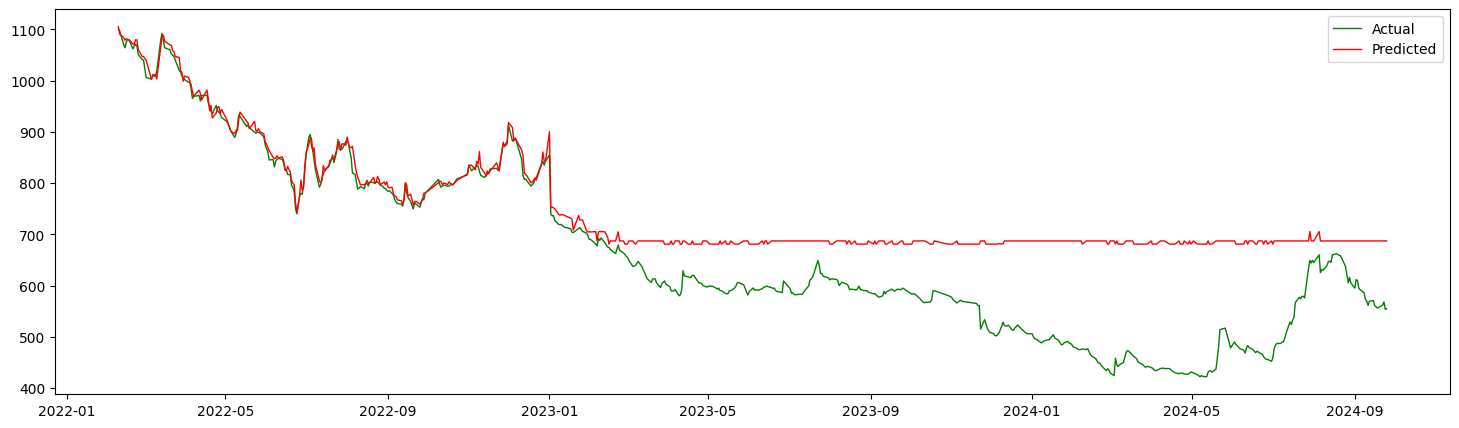

In [17]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()

## Calculating the Performance Evaluation Metrics

In [18]:
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 14309.875370979013
Root Mean Squared Error: 119.62389130511937
Mean Absolute Error: 86.66666679196845


### Here the performance metrics are too much higher so, we have to tune the hyperparameters.

In [19]:
model_params = {
    'n_estimators': [5, 10, 100, 200],
    'max_depth': [10, 20, 30, None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
    }

grid_search = GridSearchCV(XGBRegressor(random_state=42), model_params, cv=5, return_train_score=False)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [10, 20, 30, None],
                         'n_estimators': [5, 10, 100, 200]})

In [20]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 100}

In [21]:
grid_search.best_score_

0.9941610869254534

In [22]:
grid_search_prediction = grid_search.predict(X_test)
grid_search_prediction

array([1101.8956 , 1088.3665 , 1076.0247 , 1068.3098 , 1072.1418 ,
       1075.8817 , 1078.1373 , 1062.126  , 1065.3928 , 1073.271  ,
       1073.271  , 1051.5414 , 1045.7546 , 1045.7546 , 1031.6184 ,
        993.9257 , 1004.2482 , 1004.2482 ,  995.97546, 1058.468  ,
       1087.9537 , 1087.9537 , 1073.6439 , 1064.5007 , 1063.9243 ,
       1053.3397 , 1053.3397 , 1045.7546 , 1038.7058 , 1013.49133,
       1011.32556,  998.3662 , 1002.1985 , 1001.62494,  988.22955,
        985.70435,  973.61694,  967.63806,  978.19604,  970.81616,
        961.212  ,  980.2458 ,  962.0257 ,  944.02136,  942.66144,
        930.6734 ,  941.3737 ,  952.79663,  939.7624 ,  931.31055,
        939.1565 ,  920.73334,  899.09784,  906.71185,  891.3051 ,
        899.3863 ,  898.9746 ,  922.1423 ,  941.1324 ,  913.60175,
        912.2385 ,  898.405  ,  908.993  ,  910.16003,  899.3863 ,
        899.81396,  899.09784,  898.67676,  890.5956 ,  875.07684,
        871.3784 ,  865.335  ,  859.44525,  844.89   ,  841.36

In [23]:
prediction = pd.DataFrame({'Date': df.Date[round(df.shape[0]*0.8):], 'Actual': y_test, 'Predicted': grid_search_prediction})
prediction.set_index('Date', inplace=True)
prediction

,Actual,Predicted
Date,,
2022-02-09,1100.9,1101.895630
2022-02-10,1097.1,1088.366455
2022-02-13,1070.0,1076.024658
2022-02-14,1064.0,1068.309814
2022-02-15,1075.0,1072.141846
...,...,...
2024-09-18,556.0,674.097290
2024-09-22,562.0,675.723633
2024-09-23,568.0,675.553101


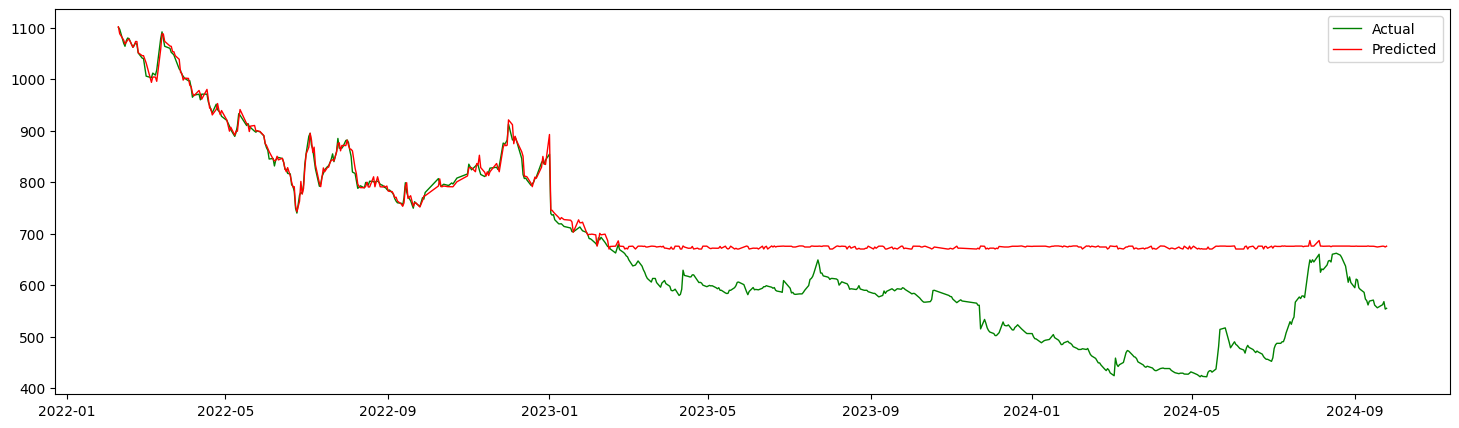

In [24]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()

### Performance Evaluation Metrics after Hyperparameter Tuning

In [25]:
mse = mean_squared_error(y_test, grid_search_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, grid_search_prediction)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 12522.897774934916
Root Mean Squared Error: 111.9057539849266
Mean Absolute Error: 78.99484388453455
